In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from time import perf_counter 

Using TensorFlow backend.


In [2]:
from fonction import *

In [3]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_unstructured_C\\data_set_C_1.csv'

In [4]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(138273, 11)

In [5]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [6]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (110618, 10)
 the size of X_test is  (27655, 10)
 the size of Y_train is  (110618, 1)
 the size of Y_test is  (27655, 1)


In [7]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(10,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00168: early stopping
MSE Train: 0.689 | MSE Test: 0.694


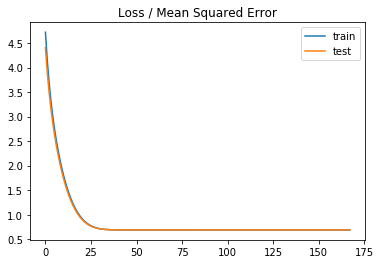

Training time is : 0.26  minute
======================Saving model==========================
Saved model to disk


In [9]:
model_base, train_mse , test_mse = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,"model_bl_data_C_1.h5",batch=1000)

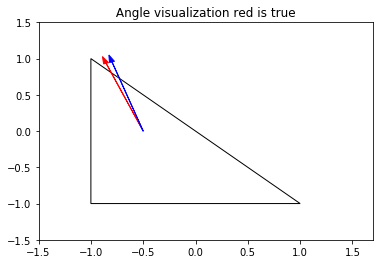

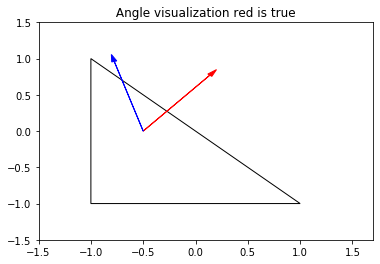

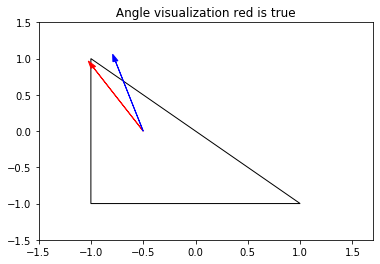

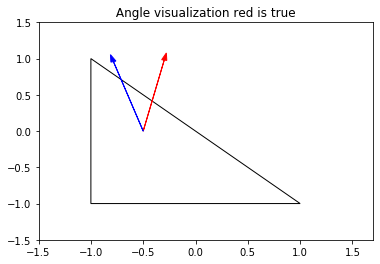

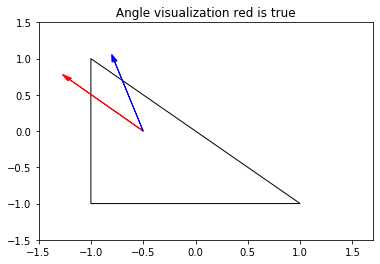

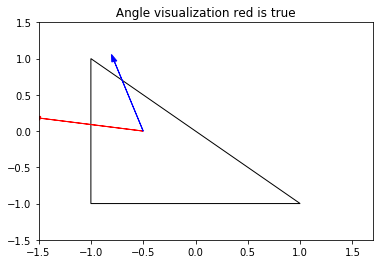

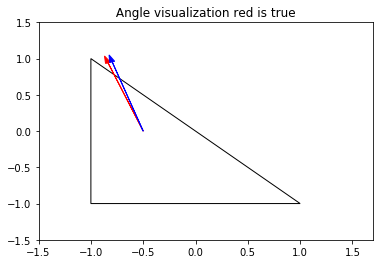

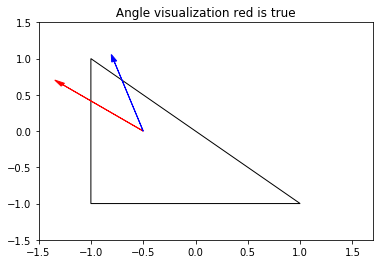

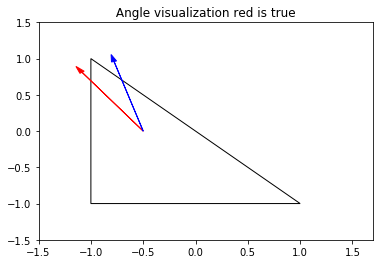

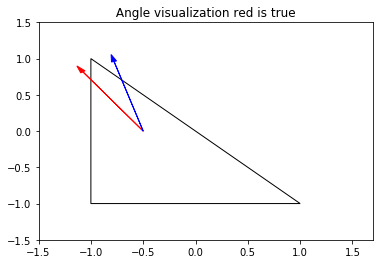

In [10]:
angle_visualization(model_base , X_test , Y_test)

In [11]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00352: early stopping
MSE Train: 0.362 | MSE Test: 0.368


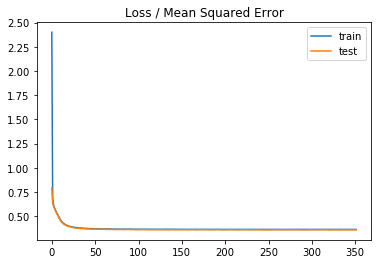

Training time is : 0.69  minute
======================Saving model==========================
Saved model to disk


In [12]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"model_3_tanh_data_C_1.h5",batch=1000)

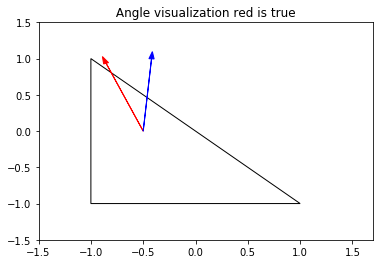

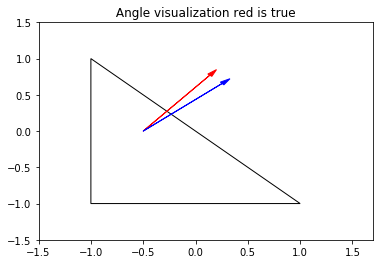

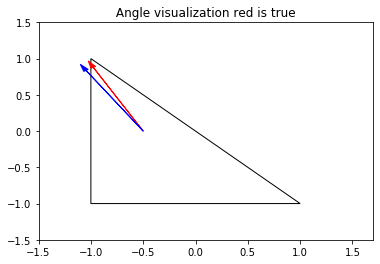

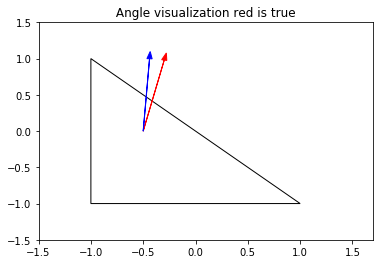

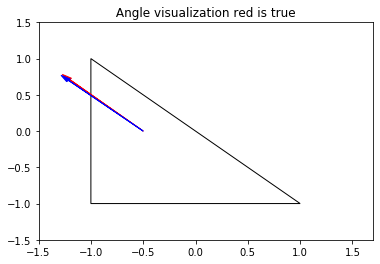

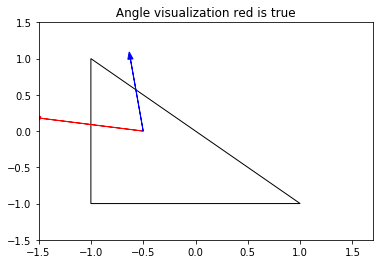

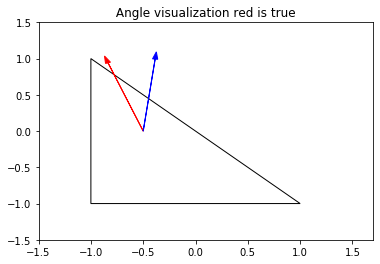

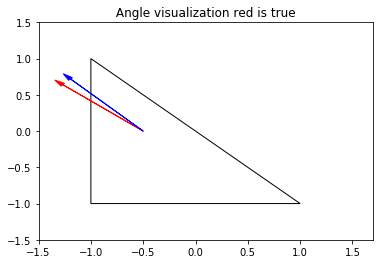

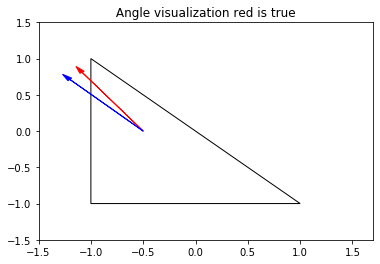

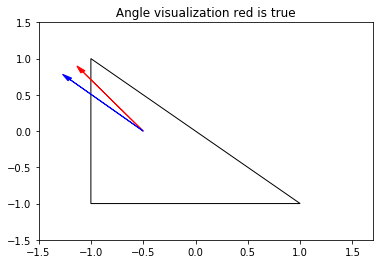

In [13]:
angle_visualization(model_3_tanh , X_test , Y_test)

### Making prediction :

Note that to load a model you have to :
- from keras.models import load_model
- model = load_model('name_of_model.h5')

In [1]:
from keras.models import load_model
model_3_tanh = load_model('model_3_tanh_data_4.h5')

Using TensorFlow backend.


In [2]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\data_test_set_4.csv'

In [6]:
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_4_01.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : 1.1833
saving prediction ...
saving succed
